In [1]:
pip install numpy

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


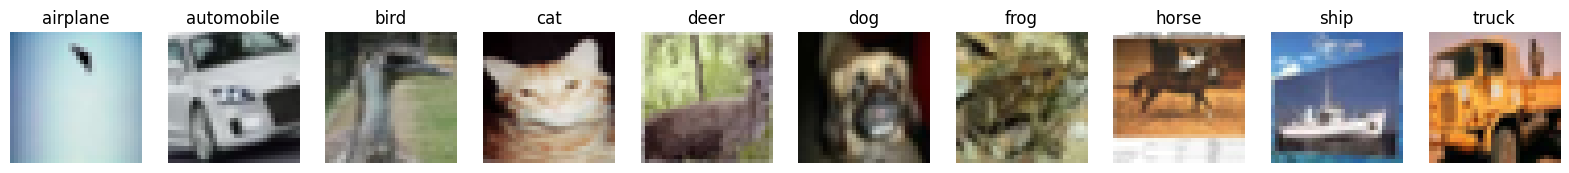

In [4]:
# Display a random image from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1, len(class_names), figsize=(20, 20))
for i in range(len(class_names)):
    class_indices = np.where(y_train == i)[0]
    random_index = random.choice(class_indices)
    ax[i].imshow(x_train[random_index])
    ax[i].axis('off')
    ax[i].set_title(class_names[i])
plt.show()

In [5]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Custom callback to stop training when accuracy is above 95%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.95:
            print(f'\nReached 95% validation accuracy. Stopping training.')
            self.model.stop_training = True

In [20]:
# Build the model
model = Sequential()
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

In [30]:
# Find the best epoch using early stopping and custom callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
cc = CustomCallback()
history = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[es, cc])

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8689 - loss: 0.3667 - val_accuracy: 0.7988 - val_loss: 0.6369
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8775 - loss: 0.3581 - val_accuracy: 0.8016 - val_loss: 0.6363
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8781 - loss: 0.3488 - val_accuracy: 0.8076 - val_loss: 0.6312
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8806 - loss: 0.3431 - val_accuracy: 0.8122 - val_loss: 0.6071
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8850 - loss: 0.3283 - val_accuracy: 0.8098 - val_loss: 0.6143
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8843 - loss: 0.3246 - val_accuracy: 0.8086 - val_loss: 0.6603
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8876 - loss: 0.3266 - val_accuracy: 0.8144 - val_loss: 0.6351
Epoch 7: early stopping


In [31]:
# Test the accuracy of the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7990 - loss: 0.6834
Test accuracy: 0.80
